# **Projeto de Retenção de Usuários no Waze**


A equipe de dados do Waze já está na metade do projeto de desenvolvimento de um modelo de aprendizado de máquina para prever a rotatividade de usuários.

Anteriormente, você concluiu uma proposta de projeto, usou Python para explorar e analisar os dados do usuário do Waze, criou visualizações de dados e conduziu um teste de hipótese. Agora, a liderança quer que sua equipe construa um modelo de regressão para prever a rotatividade de usuários com base em uma variedade de variáveis.

Você verifica sua caixa de entrada e descobre um novo e-mail de Ursula Sayo, gerente de operações do Waze. Ursula pergunta à sua equipe sobre os detalhes do modelo de regressão. Você também percebe dois e-mails de acompanhamento de sua supervisora, May Santner. O primeiro e-mail é uma resposta para Ursula e diz que a equipe irá construir um modelo de regressão logística binomial. Em seu segundo e-mail, May pede que você ajude a construir o modelo e prepare um resumo executivo para compartilhar seus resultados.

# **Modelagem de Regressão**

Nesta etapa, você construirá um modelo de regressão logística binomial. Como aprendeu, a regressão logística ajuda a estimar a probabilidade de um resultado. Para profissionais de ciência de dados, essa é uma habilidade útil, pois permite considerar mais de uma variável em relação à variável que está sendo medida. Isso abre portas para análises mais detalhadas e flexíveis.

O objetivo deste projeto é demonstrar o conhecimento de exploração de dados (EDA) e de um modelo de regressão logística binomial.

A meta é construir um modelo de regressão logística binomial e avaliar o desempenho do modelo.

<br/>

*Esta etapa tem três partes:*

**Parte 1:** EDA e Verificação das Assunções do Modelo

* Quais são alguns propósitos do EDA antes de construir um modelo de regressão logística binomial?

**Parte 2:** Construção e Avaliação do Modelo

* Quais recursos você costuma usar ao completar esta etapa?

**Parte 3:** Interpretação dos Resultados do Modelo

* Quais insights-chave surgiram de seus modelos?

* Quais recomendações de negócios você propõe com base nos modelos construídos?

<br/>

Siga as instruções e responda à pergunta abaixo para completar a atividade. Em seguida, você completará um resumo executivo usando as perguntas listadas no Documento de Estratégia PACE.

# **Construa um modelo de regressão**



# **PACE stages**





## **PACE: Planejar**


### **Tarefa 1. Importações e carregamento dos dados**
Importe os dados e pacotes que você aprendeu serem necessários para construir modelos de regressão logística.

In [ ]:
# Pacotes para numéricos + dataframes
import pandas as pd
import numpy as np

# Pacotes para visualizações
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes para Regressão Logística e Matriz de Confusão
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('waze_dataset.csv')

## **PACE: Analisar**

Considere as perguntas no seu Documento de Estratégia PACE para refletir sobre a etapa de Análise.

Nesta etapa, leve em consideração a seguinte pergunta:


* Quais são alguns propósitos da Análise Exploratória de Dados (EDA) antes de construir um modelo de regressão logística binomial?

> *Outliers e valores extremos podem impactar significativamente modelos de regressão logística. Após visualizar os dados, faça um plano para lidar com valores atípicos, seja excluindo linhas, substituindo dados extremos por dados médios e/ou removendo valores de dados maiores que 3 desvios padrão.*

>  *Atividades de EDA também incluem a identificação de dados faltantes para ajudar o analista a tomar decisões sobre sua exclusão ou inclusão, substituindo valores pelos médias, medianas e outros métodos semelhantes do conjunto de dados.*

> *Além disso, pode ser útil criar variáveis multiplicando variáveis entre si ou calculando a razão entre duas variáveis. Por exemplo, neste conjunto de dados, você pode criar uma variável chamada drives_sessions_ratio dividindo o número de drives pelo número de sessions.*

### **Tarefa 2a. Explore os dados com EDA**

Analise e descubra dados, procurando por correlações, dados faltantes, valores atípicos potenciais e/ou duplicatas.



In [ ]:
print(df.shape)

df.info()

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Pergunta:** Existem valores ausentes nos seus dados?

> *Sim, a coluna de rótulo (label) está ausente em 700 valores.*

In [ ]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use o método `drop()` para remover a coluna ID, pois você não precisa dessas informações para sua análise.

In [ ]:
df = df.drop('ID', axis=1)


Agora, verifique o equilíbrio de classes da variável dependente (alvo),  `label`.

In [ ]:
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

Use o método `describe()` nos dados.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000
driving_days,14999.0,12.179879,7.824036,0.000000,5.000000,12.000000,19.000000,30.000000


**Pergunta:** Existem variáveis que poderiam potencialmente ter valores atípicos apenas ao avaliar os valores do quartil, desvio padrão e valores máximos?

> *Sim, todas as colunas a seguir parecem ter outliers:*
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


> *Todos esses valores máximos nas colunas estão múltiplos desvios padrão acima do 75º percentil. Isso pode indicar a presença de valores atípicos nessas variáveis.*

### **Tarefa 2b. Crie features**

Crie características que podem ser de interesse para as partes interessadas e/ou que são necessárias para abordar o cenário ou problema de negócios.

#### **`km_per_driving_day`**

Você sabe da Análise Exploratória de Dados (EDA) anterior que a taxa de churn correlaciona-se com a distância percorrida por dia de direção no último mês. Pode ser útil criar uma característica que capture essa informação.

1. Crie uma nova coluna no `df` chamada `km_per_driving_day`, que representa a média da distância percorrida por dia de direção para cada usuário.

2. Utilize o método `describe()` na nova coluna.

In [ ]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Observe que alguns valores são infinitos. Isso ocorre devido à existência de valores zero na coluna `driving_days`. O Pandas atribui um valor de infinito nas linhas correspondentes da nova coluna, pois a divisão por zero é indefinida.

1. Converta esses valores de infinito para zero. Você pode utilizar `np.inf` para representar o valor infinito.

2. Execute `describe()` na coluna `km_per_driving_day` para verificar se a operação foi bem-sucedida.

In [ ]:
# 1. Converter os valores de infinito para zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirmar se funcionou
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Crie uma nova característica binária chamada `professional_driver`, atribuindo o valor 1 para usuários que realizaram 60 ou mais viagens e dirigiram em 15 ou mais dias no último mês.

Observação: O objetivo é criar uma nova característica que distinga motoristas profissionais dos demais. Nesse cenário, conhecimento de domínio e intuição são utilizados para determinar esses limiares decisivos, mas, em última análise, eles são arbitrários.

Para criar essa coluna, utilize a função [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html). Esta função aceita como argumentos:

1. Uma condição
2. O que retornar quando a condição é verdadeira
3. O que retornar quando a condição é falsa

```
Examplo:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [ ]:
# Criando `professional_driver`
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

Realize uma inspeção rápida da nova variável.

1. Verifique a contagem de motoristas profissionais e não profissionais.

2. Dentro de cada categoria (profissional e não profissional), calcule a taxa de churn.

In [ ]:
# 1. Verificando a contagem de motoristas profissionais e não profissionais
print(df['professional_driver'].value_counts())

# 2. Verificando a taxa de churn dentro de cada categoria.
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12405
1     2594
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

A taxa de churn para motoristas profissionais é de 7,6%, enquanto a taxa de churn para não profissionais é de 19,9%. Isso parece adicionar sinal preditivo ao modelo.



## **PACE: Construir**

Após a análise e a derivação de variáveis com relações próximas, é hora de começar a construir o modelo. Considere as perguntas em seu Documento de Estratégia PACE para refletir sobre a etapa de Construção.

Nesta etapa, leve em consideração a seguinte pergunta:

* Por que você selecionou as variáveis X que selecionou?

> *Inicialmente, colunas foram removidas com base em multicolinearidade elevada. Posteriormente, a seleção de variáveis pode ser refinada executando e reexecutando modelos para observar alterações na acurácia, recall, e precisão.*
<br></br>
> *A seleção inicial de variáveis foi baseada no objetivo comercial e nas informações obtidas na EDA anterior.*

### **arefa 3a. Preparação de variáveis**

Chame `info()` no DataFrame para verificar o tipo de dados da variável de rótulo e para verificar se há valores ausentes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Como você sabe pela análise exploratória de dados (EDA) anterior que não há evidências de uma causa não aleatória para os 700 valores ausentes na coluna `label` e, visto que essas observações representam menos de 5% dos dados, utilize o método `dropna()` para excluir as linhas que estão sem esses dados.

In [ ]:
# Exclua as linhas com dados ausentes na coluna label
df = df.dropna(subset=['label'])

#### **Impute outliers**

Você raramente deseja excluir outliers e geralmente não o fará a menos que haja uma razão clara para isso (por exemplo, erros tipográficos).

Às vezes, os outliers podem ser substituídos pela mediana, média, percentil 95, etc.

Anteriormente, você determinou que sete das variáveis tinham sinais claros de conter outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

Para esta análise, faça a imputação dos valores atípicos para essas colunas. Calcule o **percentil 95** de cada coluna e altere para esse valor qualquer valor na coluna que o exceda.



In [ ]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

Utilize `describe()`.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,14299.0,76.539688,67.243178,0.000000,23.000000,56.000000,111.000000,243.000000
drives,14299.0,63.964683,55.127927,0.000000,20.000000,48.000000,93.000000,200.000000
total_sessions,14299.0,183.717304,118.720520,0.220211,90.457733,158.718571,253.540450,455.439492
n_days_after_onboarding,14299.0,1751.822505,1008.663834,4.000000,878.500000,1749.000000,2627.500000,3500.000000
total_navigations_fav1,14299.0,114.562767,124.378550,0.000000,10.000000,71.000000,178.000000,422.000000
total_navigations_fav2,14299.0,27.187216,36.715302,0.000000,0.000000,9.000000,43.000000,124.000000
driven_km_drives,14299.0,3944.558631,2218.358258,60.441250,2217.319909,3496.545617,5299.972162,8898.716275
duration_minutes_drives,14299.0,1792.911210,1224.329759,18.282082,840.181344,1479.394387,2466.928876,4668.180092
activity_days,14299.0,15.544653,9.016088,0.000000,8.000000,16.000000,23.000000,31.000000
driving_days,14299.0,12.182530,7.833835,0.000000,5.000000,12.000000,19.000000,30.000000


#### **Codifique as variáveis categóricas**

Altere o tipo de dados da coluna `label` para binário. Essa alteração é necessária para treinar um modelo de regressão logística.

Atribua `0` para todos os usuários retidos - `retained`

Atribua `1` para todos os usuários que saíram - `churned`

Salve esta variável como `label2` para não substituir a variável `label` original.

Observação: Existem várias maneiras de fazer isso. Considere usar `np.where()`, como feito anteriormente neste notebook.


In [ ]:
# Criando a coluna binária `label2`
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


### **Tarefa 3b. Verificar se as suposições foram atendidas**

A seguir estão as suposições para regressão logística:

* Observações independentes (Isso se refere à forma como os dados foram coletados.)

* Ausência de valores extremos

* Pouca ou nenhuma multicolinearidade entre os preditores X

* Relação linear entre X e o log de y

Para a primeira suposição, podemos considerar que as observações são independentes para este projeto.

A segunda suposição já foi abordada.

A última suposição será verificada após a modelagem.

*Observação:* Na prática, as suposições de modelagem são frequentemente violadas e, dependendo dos detalhes do seu caso de uso e da gravidade da violação, isso pode não afetar muito o seu modelo ou resultar em um modelo não eficaz.

#### **Multicolinearidade**

Verifique a correlação entre as variáveis preditoras. Primeiro, gere uma matriz de correlação.

In [ ]:
# Gerando a matriz de correlação
df.corr(method='pearson')

<ipython-input-18-ed36116c223a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Agora, plote um mapa de calor de correlação.

<ipython-input-21-0b93d2304a73>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')


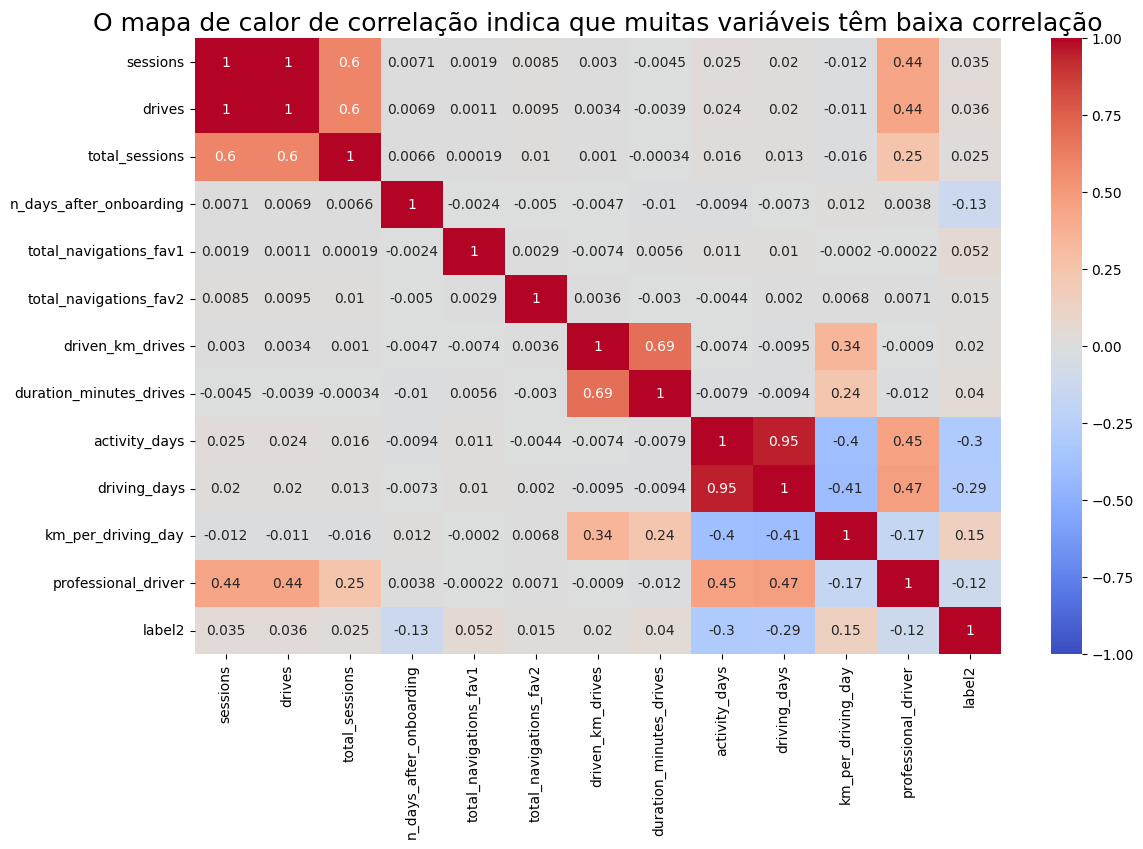

In [ ]:
# Plot do heatmap
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('O mapa de calor de correlação indica que muitas variáveis têm baixa correlação',
          fontsize=18)
plt.show();

Se houver variáveis preditoras com um valor de coeficiente de correlação de Pearson maior do que o valor absoluto de 0,7, essas variáveis são fortemente multicolineares. Portanto, apenas uma dessas variáveis deve ser usada em seu modelo.

*Observação:* 0,7 é um limiar arbitrário. Algumas indústrias podem usar 0,6, 0,8, etc.

**Pergunta:** Quais variáveis são multicolineares entre si?

> * *`sessions` e `drives`: 1.0*
<br>
> * *`driving_days` e `activity_days`: 0.95*

### **Tarefa 3c. Criar variáveis dummy (se necessário)**

Se você selecionou `device` como uma variável X, será necessário criar variáveis dummy, já que esta variável é categórica.

Em casos com muitas variáveis categóricas, você pode usar a função [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) incorporada ao pandas, ou pode usar a função [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) do scikit-learn.

*Observação:* Variáveis com muitas categorias devem ser dummy apenas se absolutamente necessário. Cada categoria resultará em um coeficiente para o seu modelo, o que pode levar ao overfitting.

Como este conjunto de dados tem apenas uma característica categórica restante (device), não é necessário usar uma dessas funções especiais. Você pode implementar a transformação diretamente.

Crie uma nova coluna binária chamada `device2` que codifica os dispositivos do usuário da seguinte forma:

* `Android` -> `0`
* `iPhone` -> `1`

In [ ]:
# Criando a nova variável `device2`
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### **Tarefa 3d. Construção do modelo**

#### **Atribuir variáveis preditoras e alvo**

Para construir seu modelo, é necessário determinar quais variáveis X você deseja incluir no modelo para prever seu alvo - `label2`.

Exclua as seguintes variáveis e atribua os resultados a X:

* label (esta é a variável alvo)
* label2 (esta é a variável alvo)
* device (esta é a variável categórica não binariamente codificada)
* sessions (isso apresentou alta multicolinearidade)
* driving_days (isso apresentou alta multicolinearidade)

Observação: Observe que `sessions` e `driving_days` foram escolhidos para serem excluídos, em vez de `drives` e `activity_days`. A razão para isso é que as características mantidas para a modelagem tinham correlações ligeiramente mais fortes com a variável alvo do que as características que foram excluídas.

In [ ]:
# Isolar variáveis preditoras
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

Agora, isole a variável dependente (alvo). Atribua-a a uma variável chamada `y`.

In [ ]:
# Isolar variável alvo
y = df['label2']

#### **Dividir os dados**

Utilize a função [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do scikit-learn para realizar uma divisão entre treino e teste nos seus dados, utilizando as variáveis X e y que foram atribuídas anteriormente.

Observação 1: É importante realizar uma divisão entre treino e teste para obter previsões precisas. Sempre é desejável ajustar o modelo ao conjunto de treinamento e avaliar o modelo no conjunto de teste para evitar vazamento de dados.

Observação 2: Como a classe alvo está desbalanceada (82% retidos vs. 18% cancelados), é importante garantir que a divisão não resulte em uma representação desproporcional da classe minoritária. Defina o parâmetro stratify da função como y para garantir que a classe minoritária apareça tanto no conjunto de treinamento quanto no conjunto de teste na mesma proporção que no conjunto de dados geral.

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


Utilize o scikit-learn para instanciar um modelo de regressão logística. Adicione o argumento `penalty = None`.

É importante adicionar penalty = 'none' já que seus preditores não estão normalizados.

Consulte a documentação de [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) do scikit-learn para obter mais informações..

Ajuste o modelo usando `X_train` e `y_train`.

In [ ]:
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

Chame o atributo `.coef_` no modelo para obter os coeficientes de cada variável. Os coeficientes estão na ordem em que as variáveis são listadas no conjunto de dados. Lembre-se de que os coeficientes representam a mudança nas probabilidades logarítmicas da variável alvo para cada aumento de uma unidade em X.

Se desejar, crie uma série cujo índice são os nomes das colunas e cujos valores são os coeficientes em `model.coef_.`

In [ ]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64

Chame o atributo `intercept_` do modelo para obter o intercepto do modelo.

In [ ]:
model.intercept_

array([-0.00170675])

#### **Verificar a última suposição**

Verifique a relação linear entre X e as probabilidades logarítmicas estimadas (conhecidas como logits) fazendo um gráfico de regressão (regplot).

Chame o método `predict_proba()` do modelo para gerar a probabilidade de resposta para cada amostra nos dados de treinamento. (Os dados de treinamento são o argumento para o método.) Atribua o resultado a uma variável chamada `training_probabilities`. Isso resulta em uma matriz 2D onde cada linha representa um usuário em `X_train`. A primeira coluna é a probabilidade de o usuário não cancelar, e a segunda coluna é a probabilidade de o usuário cancelar.

In [ ]:
# Obtenha as probabilidades previstas dos dados de treinamento
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93963486, 0.06036514],
       [0.619673  , 0.380327  ],
       [0.76463175, 0.23536825],
       ...,
       [0.91909639, 0.08090361],
       [0.85092117, 0.14907883],
       [0.93516291, 0.06483709]])

Na regressão logística, a relação entre uma variável preditora e a variável dependente não precisa ser linear; no entanto, os logaritmos das probabilidades (também conhecidos como logit) da variável dependente em relação à variável preditora devem ser lineares. Aqui está a fórmula para calcular os logaritmos das probabilidades, onde p é a probabilidade de resposta:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Crie um dataframe chamado `logit_data` que seja uma cópia de `df`.

2. Crie uma nova coluna chamada `logit` no dataframe `logit_data`. Os dados nesta coluna devem representar o logit para cada usuário.


In [ ]:
# 1. Crie um dataframe chamado `logit_data` que seja uma cópia de `df`
logit_data = X_train.copy()

# 2. Crie uma nova coluna chamada `logit` no dataframe `logit_data`
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plote um gráfico de regressão (regplot) onde o eixo x representa uma variável independente e o eixo y representa os logaritmos das probabilidades previstas.

Em uma análise abrangente, isso seria plotado para cada variável preditora contínua ou discreta. Aqui mostramos apenas `activity_days`.

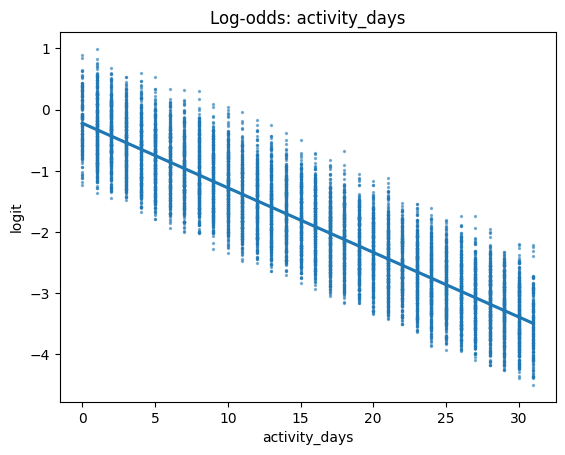

In [ ]:
# Plote o gráfico de regressão (regplot) dos logaritmos das probabilidades para 'activity_days'
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');



## **PACE: Executar**



### **Tarefa 4a. Resultados e avaliação**

Se as suposições da regressão logística forem atendidas, os resultados do modelo podem ser interpretados adequadamente.

Utilize o bloco de código abaixo para fazer previsões nos dados de teste.


In [ ]:
# Gerar previsões em X_test
y_preds = model.predict(X_test)

Agora, use o método `score()` no modelo com `X_test` e `y_test` como seus dois argumentos. A métrica padrão no scikit-learn é a acurácia. Qual é a acurácia do seu modelo?

*Considere: A acurácia é a melhor métrica para avaliar este modelo?*

In [ ]:
# Avalie o modelo (acurácia) nos dados de teste
model.score(X_test, y_test)

0.8237762237762237

### **arefa 4b. Mostrar resultados com uma matriz de confusão**

Utilize a função `confusion_matrix` para obter uma matriz de confusão. Utilize `y_test` e `y_preds` como argumentos

In [ ]:
cm = confusion_matrix(y_test, y_preds)

Em seguida, utilize a função `ConfusionMatrixDisplay()` para exibir a matriz de confusão da célula anterior, passando a matriz de confusão recém-criada como seu argumento.

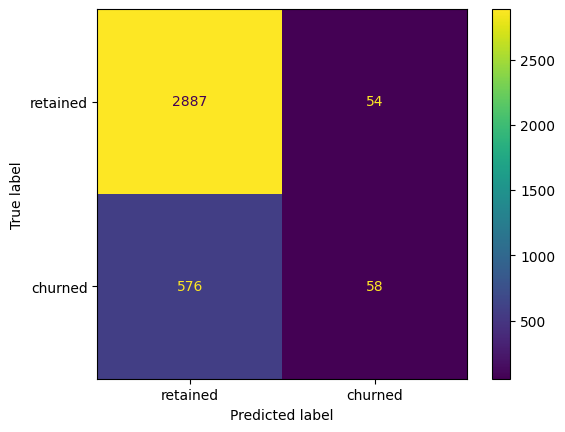

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

Você pode usar a matriz de confusão para calcular precisão e recall manualmente. Também pode utilizar a função  [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do scikit-learn para gerar uma tabela a partir de  `y_test` e `y_preds`.

In [ ]:
# Calcular a precisão manualmente
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5178571428571429

In [ ]:
# Calcular o recall manualmente
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.0914826498422713

In [ ]:
# Criar um relatório de classificação
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



Observação: O modelo possui precisão mediana e recall muito baixo, o que significa que ele faz muitas previsões de falsos negativos e falha em capturar usuários que cancelarão.

### **BÔNUS**

Gerar um gráfico de barras dos coeficientes do modelo para uma representação visual da importância das características do modelo.

In [ ]:
# Criar uma lista de tuplas (nome_da_coluna, coeficiente)
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Ordenar a lista pelo valor do coeficiente
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.001913369447769776),
 ('total_navigations_fav1', 0.001231754741616306),
 ('total_navigations_fav2', 0.0009314786513814626),
 ('total_sessions', 0.00032707088819142904),
 ('duration_minutes_drives', 0.00010909343558951453),
 ('km_per_driving_day', 1.8223094015325207e-05),
 ('driven_km_drives', -1.4860453424647997e-05),
 ('n_days_after_onboarding', -0.00040647763730561445),
 ('device2', -0.0010412175209008018),
 ('professional_driver', -0.0015285041567402024),
 ('activity_days', -0.10603196504385491)]

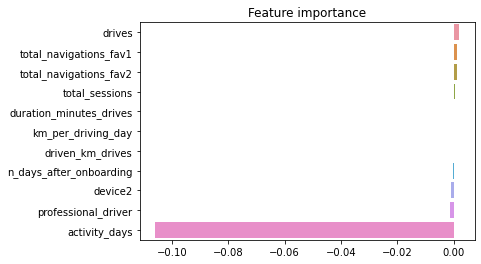

In [ ]:
# Plotar as importâncias das características
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### **Tarefa 4c. Conclusão**

Agora que você construiu seu modelo de regressão, o próximo passo é compartilhar suas descobertas com a equipe de liderança da Waze. Considere as seguintes perguntas enquanto se prepara para escrever seu resumo executivo. Pense nos pontos-chave que você deseja compartilhar com a equipe e em que informações são mais relevantes para o projeto de previsão de cancelamentos de usuários.

**Perguntas:**


1. Qual variável mais influenciou a previsão do modelo? Como? Isso foi surpreendente?

> _`activity_days` oi de longe a característica mais importante no modelo. Ela teve uma correlação negativa com o cancelamento do usuário. Isso não foi surpreendente, pois essa variável estava fortemente correlacionada com `driving_days`, o que era conhecido a partir da Análise Exploratória de Dados (EDA) por ter uma correlação negativa com o cancelamento._

2. Houve alguma variável que você esperava que fosse um preditor mais forte do que realmente foi?

> _Sim. Na EDA anterior, a taxa de cancelamento de usuários aumentou à medida que os valores em `km_per_driving_day` aumentaram. O mapa de calor de correlação aqui neste notebook revelou que essa variável tinha a correlação positiva mais forte com o cancelamento de todas as variáveis preditoras, por uma margem relativamente grande. No modelo, ela foi a segunda menos importante._

3. Por que uma variável que você considerava importante não é relevante no modelo?

> _Em um modelo de regressão logística múltipla, as características podem interagir entre si, e essas interações podem resultar em relações aparentemente contraintuitivas. Isso é tanto uma vantagem quanto uma desvantagem dos modelos preditivos, pois capturar essas interações normalmente torna um modelo mais preditivo, ao mesmo tempo em que torna o modelo mais difícil de explicar._

4. Você recomendaria que a Waze utilizasse esse modelo? Por quê ou por que não?

> _Depende. Para que o modelo seria usado? Se for usado para impulsionar decisões de negócios significativas, então não. O modelo não é um preditor forte, como evidenciado por sua pontuação de recall baixa. No entanto, se o modelo for usado apenas para orientar esforços exploratórios adicionais, então pode ter valor._

5. O que você poderia fazer para melhorar este modelo?

> _Novas características podem ser desenvolvidas para tentar gerar um sinal preditivo melhor, como frequentemente ocorre com conhecimento de domínio. No caso deste modelo, uma das características desenvolvidas (`professional_driver`) foi a terceira mais preditiva. Também poderia ser útil dimensionar as variáveis preditoras e/ou reconstruir o modelo com diferentes combinações de variáveis preditoras para reduzir o ruído de características não preditivas._

6. Quais recursos adicionais seriam úteis para ajudar a melhorar o modelo?

> _Seria útil ter informações em nível de viagem para cada usuário (como tempos de viagem, localizações geográficas, etc.). Provavelmente também seria útil ter dados mais granulares para saber como os usuários interagem com o aplicativo. Por exemplo, com que frequência eles relatam ou confirmam alertas de riscos na estrada? Por fim, seria útil conhecer a contagem mensal de locais de início e término exclusivos que cada motorista insere._